get a list of words used for each part of type to be used in [word cloud](https://www.wordclouds.com/) for presentation

like word cloud 'E' of all words used by Extroverts versus word cloud 'I'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
mbti = pd.read_csv('data/train.csv')

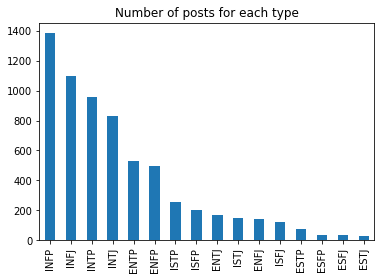

In [279]:
mbti['type'].value_counts().plot(kind = 'bar', title='Number of posts for each type')


In [6]:
all_mbti = []
for i, row in mbti.iterrows():
    for post in row['posts'].split('|||'):
        all_mbti.append([row['type'], post])
all_mbti = pd.DataFrame(all_mbti, columns=['type', 'post'])

In [7]:
print(f"before:  {mbti.shape} \nafter: {all_mbti.shape}")

before:  (6506, 2) 
after: (316548, 2)


In [115]:
mbti_type = pd.concat([mbti['type'].value_counts().to_frame(name='before'), all_mbti['type'].value_counts().to_frame(name='after')],axis=1)
mbti_type


before  after
ENFJ     143   6947
ENFP     496  23925
ENTJ     167   8174
ENTP     530  26017
ESFJ      35   1668
ESFP      36   1663
ESTJ      30   1495
ESTP      71   3437
INFJ    1100  53807
INFP    1386  67846
INTJ     830  39776
INTP     960  46637
ISFJ     124   6051
ISFP     198   9521
ISTJ     145   7018
ISTP     255  12566

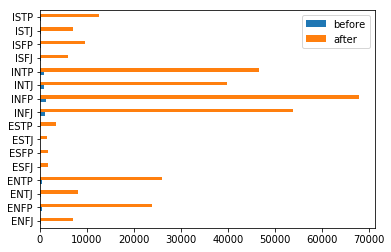

In [280]:
mbti_type.plot(kind='barh')

It's easier to do binary classification than 16 class (multi-class) classification.

In [9]:
def split_type(row):
    ''' 
       Split MBTI type into individual features for Binary Classification
       eg ENFP = [0 1 0 0]
    '''
    t = row['type']
    I,N,T,J = 0,0,0,0
    
    I = 1 if t[0] =='I' else 0
    
    N = 1 if t[1] == 'N' else 0
    
    T = 1 if t[2] == 'T' else 0
    
    J = 1 if t[3] == 'J' else 0
    
    return pd.Series( {'IE':I, 'NS':N , 'TF': T, 'JP': J }) 

In [10]:
all_mbti = all_mbti.join(all_mbti.apply(lambda row: split_type(row), axis=1))
all_mbti.head(5)

type                                               post  IE  JP  NS  TF
0  INFJ        'http://www.youtube.com/watch?v=qsXHcwe3krw   1   1   1   0
1  INFJ  http://41.media.tumblr.com/tumblr_lfouy03PMA1q...   1   1   1   0
2  INFJ  enfp and intj moments  https://www.youtube.com...   1   1   1   0
3  INFJ  What has been the most life-changing experienc...   1   1   1   0
4  INFJ  http://www.youtube.com/watch?v=vXZeYwwRDw8   h...   1   1   1   0

In [11]:
# rearrange columns
all_mbti = all_mbti[['type', 'IE', 'NS', 'TF', 'JP', 'post']]
all_mbti.head(5)

type  IE  NS  TF  JP                                               post
0  INFJ   1   1   0   1        'http://www.youtube.com/watch?v=qsXHcwe3krw
1  INFJ   1   1   0   1  http://41.media.tumblr.com/tumblr_lfouy03PMA1q...
2  INFJ   1   1   0   1  enfp and intj moments  https://www.youtube.com...
3  INFJ   1   1   0   1  What has been the most life-changing experienc...
4  INFJ   1   1   0   1  http://www.youtube.com/watch?v=vXZeYwwRDw8   h...

In [128]:
print ("Introversion (I) -     Extroversion (E):\t")
print("\t", all_mbti['IE'].value_counts()[0], "  -     ", all_mbti['IE'].value_counts()[1])
print ("Intuition (N)    -     Sensing (S):\t\t")
print("\t", all_mbti['NS'].value_counts()[0], "  -     ", all_mbti['NS'].value_counts()[1])
print ("Thinking (T)     -     Feeling (F):\t\t")
print("\t", all_mbti['TF'].value_counts()[0], " -      ", all_mbti['TF'].value_counts()[1])
print ("Judging (J)      -     Perceiving (P):\t\t")
print("\t", all_mbti['JP'].value_counts()[0], " -      ", all_mbti['JP'].value_counts()[1])

Introversion (I) -     Extroversion (E):	
	 73326   -      243222
Intuition (N)    -     Sensing (S):		
	 43419   -      273129
Thinking (T)     -     Feeling (F):		
	 171428  -       145120
Judging (J)      -     Perceiving (P):		
	 191612  -       124936


### Stop Words

In [114]:
my_stopwords = ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren',
"aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can',
'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't",
'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't",
'have', 'haven', "haven't", 'having',  'how', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its',
'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'needn',
"needn't", 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't",
'she', "she's", 'should', "should've",'shouldn', "shouldn't", 'so', 'some', 'such', 't', 'than', 'that', "that'll", 'the', 'then',
'there', 'these', 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 've', 'very', 'was', 'wasn', "wasn't", 'we',
'were', 'weren', "weren't", 'what', 'when', 'where', 'which', 'while', 'who', 'whom', 'why', 'will', 'with', 'won', "won't",
'wouldn', "wouldn't", 'y','ISTJ', 'ISFJ', 'INFJ', 'INTJ', 'ISTP', 'ISFP', 'INFP', 'INTP', 'ESTP', 'ESFP', 'ENFP', 'ENTP', 'ESTJ',
'ESFJ', 'ENFJ', 'ENTJ']
print("Number of stop words: {}".format(len(my_stopwords)))

Number of stop words: 164


In [105]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS 
print("Number of stop words: {}".format(len(ENGLISH_STOP_WORDS)))

Number of stop words: 318


In [132]:
my_stopwords2 = ['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along',
                 'already', 'also', 'although', 'always', 'among', 'amongst', 'amoungst', 'amount', 'an', 'and', 
                 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 
                 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being',
                 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both', 'bottom', 'but', 'by', 'call', 'can', 
                 'cannot', 'cant', 'co', 'con', 'could', 'couldnt', 'cry', 'de', 'describe', 'detail', 'do', 'done', 'down', 
                 'due', 'during', 'each', 'eg', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 
                 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fifty', 'fill', 
                 'find', 'fire', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'found', 'four', 'from', 'front', 
                 'full', 'further', 'get', 'give', 'go', 'had', 'has', 'hasnt', 'have', 'hence', 'here', 
                 'hereafter', 'hereby', 'herein', 'hereupon', 'how', 'however', 
                 'hundred', 'ie', 'if', 'in', 'inc', 'indeed', 'interest', 'into', 'is', 'it', 'its', 'itself', 'keep', 
                 'last', 'latter', 'latterly', 'least', 'less', 'ltd', 'made', 'many', 'may', 'meanwhile', 'might', 
                 'mill', 'more', 'moreover', 'most', 'mostly', 'move', 'much', 'must', 'name', 'namely', 
                 'neither', 'never', 'nevertheless', 'next', 'nine', 'no', 'nobody', 'none', 'noone', 'nor', 'nothing', 
                 'now', 'nowhere', 'of', 'off', 'often', 'on', 'once', 'one', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 
                 'out', 'over', 'own', 'part', 'per', 'perhaps', 'please', 'put', 'rather', 're', 'same',
                 'see', 'seem', 'seemed', 'seeming', 'seems', 'serious', 'several', 'should', 'show', 'side', 'since', 
                 'sincere', 'six', 'sixty', 'so', 'some', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 
                 'still', 'such', 'system', 'take', 'ten', 'than', 'that', 'the', 'then', 'thence', 
                 'there', 'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'thick', 'thin', 'third', 
                 'this', 'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'top', 'toward', 
                 'towards', 'twelve', 'twenty', 'two', 'un', 'under', 'until', 'up', 'upon', 'us', 'very', 'via', 'was', 'well', 
                 'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby', 'wherein', 
                 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom', 'whose', 'why', 
                 'will', 'with', 'within', 'without', 'would', 'yet', 'you', 'your', 'yours', 'yourself', 'yourselves']



In [133]:
print("Number of my_stopwords2: {}".format(len(my_stopwords2)))

Number of my_stopwords2: 296


words removed from ENGLISH_STOP_WORDS

In [134]:
not_ENGLISH_STOP_WORDS = ['am', 'he', 'her', 'i', 'hers', 'herself', 'him', 'himself', 'his', 'me', 'mine', 'my', 'myself', 
                          'not', 'our', 'ours', 'ourselves', 'she', 'their', 'them', 'themselves', 'we',]
print(f'{len(not_ENGLISH_STOP_WORDS)} words removed from ENGLISH_STOP_WORDS')

22 words removed from ENGLISH_STOP_WORDS


### Training

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [278]:
all_mbti['post'].head(40)

0           'http://www.youtube.com/watch?v=qsXHcwe3krw
1     http://41.media.tumblr.com/tumblr_lfouy03PMA1q...
2     enfp and intj moments  https://www.youtube.com...
3     What has been the most life-changing experienc...
4     http://www.youtube.com/watch?v=vXZeYwwRDw8   h...
5                  May the PerC Experience immerse you.
6     The last thing my INFJ friend posted on his fa...
7     Hello ENFJ7. Sorry to hear of your distress. I...
8     84389  84390  http://wallpaperpassion.com/uplo...
9                                    Welcome and stuff.
10    http://playeressence.com/wp-content/uploads/20...
11    Prozac, wellbrutin, at least thirty minutes of...
12    Basically come up with three items you've dete...
13    All things in moderation.  Sims is indeed a vi...
14    Dear ENFP:  What were your favorite video game...
15          https://www.youtube.com/watch?v=QyPqT8umzmY
16                     It appears to be too late. :sad:
17              There's someone out there for ev

In [270]:
X_train, X_test, y_train, y_test = train_test_split(all_mbti['post'], all_mbti['type'], test_size=0.3, 
                                                    random_state=6)

---
## one is good, more is better. Random Forest

In [199]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

In [271]:
forest_pipe = Pipeline([('count_vec', TfidfVectorizer(binary=True, min_df=3, ngram_range=(1,2), stop_words='english')),
                      ('forest', RandomForestClassifier(n_estimators=50, random_state=2, class_weight="balanced", criterion='gini'))
                    ])

In [272]:
%%time
forest_pipe.fit(X_test, y_test)

CPU times: user 11min 57s, sys: 3.74 s, total: 12min
Wall time: 12min 4s


Pipeline(memory=None,
     steps=[('count_vec', TfidfVectorizer(analyzer='word', binary=True, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=3,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True...estimators=50, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False))])

In [273]:
print("Accuracy on training set: {:.3f}".format(forest_pipe.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest_pipe.score(X_test, y_test)))

Accuracy on training set: 0.249
Accuracy on test set: 0.955


In [274]:
y_pred = forest_pipe.predict(X_test)
confusion_matrix(y_pred, y_test)

array([[ 1982,    15,     6,    18,     1,     0,     0,     1,    47,
           58,    25,    25,     2,     5,     4,    10],
       [    0,  6913,     0,     5,     0,     0,     0,     0,    18,
           27,    10,     9,     1,     0,     0,     4],
       [    3,    10,  2414,     8,     0,     0,     0,     1,    26,
           29,    12,    12,     0,     2,     2,     3],
       [    0,     4,     0,  7464,     0,     0,     0,     0,    16,
           23,    14,    19,     0,     0,     0,     1],
       [    1,     0,     1,     1,   496,     0,     0,     1,     1,
            3,     2,     1,     0,     0,     0,     0],
       [   20,   113,    39,   152,     5,   511,     5,    19,   223,
          272,   185,   195,    22,    48,    40,    53],
       [    3,    12,     0,    13,     0,     1,   428,     0,    18,
           21,    13,    18,     2,     5,     0,     6],
       [    2,     9,     5,    13,     0,     0,     0,  1025,    13,
           18,    12,    1

In [275]:
print(classification_report(y_pred, y_test))

             precision    recall  f1-score   support

       ENFJ       0.97      0.90      0.94      2199
       ENFP       0.96      0.99      0.98      6987
       ENTJ       0.97      0.96      0.96      2522
       ENTP       0.95      0.99      0.97      7541
       ESFJ       0.98      0.98      0.98       507
       ESFP       0.99      0.27      0.42      1902
       ESTJ       0.98      0.79      0.88       540
       ESTP       0.96      0.91      0.93      1127
       INFJ       0.95      1.00      0.97     15412
       INFP       0.95      1.00      0.97     19232
       INTJ       0.96      0.99      0.97     11534
       INTP       0.95      1.00      0.97     13465
       ISFJ       0.96      0.95      0.95      1807
       ISFP       0.97      0.64      0.77      4348
       ISTJ       0.96      0.94      0.95      2081
       ISTP       0.96      0.96      0.96      3761

avg / total       0.96      0.95      0.95     94965



In [181]:
print(classification_report(y_pred, y_test)) # 23 mins

             precision    recall  f1-score   support

          0       1.00      0.94      0.97     60726
          1       0.91      0.99      0.95     34239

avg / total       0.96      0.96      0.96     94965



In [174]:
forest_pipe = Pipeline([('count_vec', CountVectorizer(binary=True, min_df=3, ngram_range=(1,2), stop_words='english')),
                      ('forest', RandomForestClassifier(n_estimators=10, random_state=2))
                    ])
print(classification_report(y_pred, y_test)) #1.5 mins

             precision    recall  f1-score   support

          0       0.99      0.94      0.97     60476
          1       0.91      0.99      0.95     34489

avg / total       0.96      0.96      0.96     94965



In [157]:
# baseline no stopwords
print(classification_report(y_pred, y_test))

             precision    recall  f1-score   support

          0       0.98      0.92      0.95     61250
          1       0.87      0.97      0.92     33715

avg / total       0.94      0.94      0.94     94965



In [ ]:
# .94 binary=True, min_df=3, ngram_range=(1,2), stop_words='english')

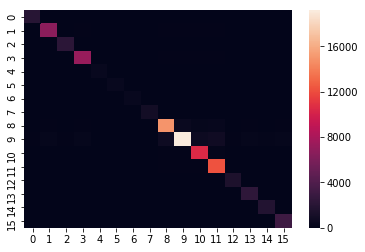

In [74]:
sns.heatmap(confusion_matrix(y_pred, y_test))

In [226]:
forest_pipe.predict_proba(X_test)

array([[ 0.9       ,  0.1       ],
       [ 0.35234874,  0.64765126],
       [ 0.14      ,  0.86      ],
       ..., 
       [ 0.18      ,  0.82      ],
       [ 0.82      ,  0.18      ],
       [ 0.776     ,  0.224     ]])

In [221]:
print(y_pred)

[0 1 1 ..., 1 0 0]


In [ ]:
# View a list of the features and their importance scores
list(zip(train[features], clf.feature_importances_))

___
another ensemle model; Gradient Boosting

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
gbrt_pipe = Pipeline([('count_vec', CountVectorizer(binary=True, min_df=3, ngram_range=(1,2), stop_words=my_stopwords)),
                        ('gbrt', GradientBoostingClassifier(random_state=0))
                      ])

In [47]:
%%time
gbrt_pipe.fit(X_train, y_train)

CPU times: user 3min 10s, sys: 2.25 s, total: 3min 12s
Wall time: 3min 16s


Pipeline(memory=None,
     steps=[('count_vec', CountVectorizer(analyzer='word', binary=True, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=3,
        ngram_range=(1, 2), preprocessor=None,
        stop_words=['a', '...         presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False))])

In [49]:
print("Accuracy on training set: {:.3f}".format(gbrt_pipe.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt_pipe.score(X_test, y_test)))

Accuracy on training set: 0.776
Accuracy on test set: 0.772


How do they measure up?

---
GridSearch to find best parameters of LinearSVM, LogisticRegression, DecisionTree and RandomForest

include tfidfvectorizer (True, False)

In [ ]:
from sklearn.grid_search import GridSearchCV

In [ ]:
rfc = RandomForestClassifier(n_jobs=-1, oob_score = True) 

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X, y)
print CV_rfc.best_params_

In [ ]:
parameters= {
    count_vec__binary : (False, True),
    count_vec__min_df : [1,2,3],
    count_vec__ngram_range : [(1,1),(1,2),(1,3)],
    count_vec__stop_words : (None, 'english', my_stopwords),
    
}